In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

In [2]:
np.set_printoptions(threshold=10)

## Generating Univariate Data

In [3]:
def generate_data(n, l=-100, h=100, m=None, c=None, s=10):
    m = m if m else np.random.randn(1)
    c = c if c else np.random.randint(l, h)
    x = np.random.uniform(l, h, n)
    y = m * x + c
    noise = s * np.random.randn(n) + y.mean()
    y = y + noise
    return x, y, m, c

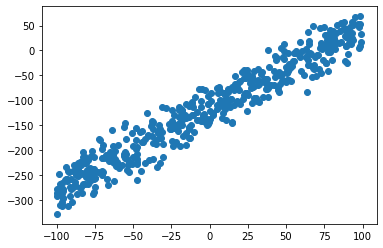

In [4]:
x_train, y_train, slope, intercept = generate_data(500, s=25)
plt.scatter(x_train, y_train)

## Simple Linear Regression Model

In [5]:
class SimpleLinearRegressor:
    def __init__(self, weight=None, bias=None, normalize=True):
        self.weight = weights if weight else np.random.randn(1)
        self.bias = bias if bias else np.random.randn(1)
        self.__normalize = normalize
        self.__scaling_params = (0, 1)
        self.loss_per_epochs = []
    
    def __transform(self, x):
        if self.__normalize:
            mu, s = self.__scaling_params
            x = (x - mu) / (s + 1e-9)
        return x
    
    def fit(self, x, y, epochs=1, batch_size=None, alpha=0.001, verbose=True):
        self.__scaling_params = (x.mean(), x.std())
        x = self.__transform(x)
        losses = []
        for i in range(epochs):
            y_pred = self.weight * x + self.bias
            J = 0.5 * np.mean(np.square(y - y_pred))
            self.weight -= alpha * np.mean((y_pred - y) * x)
            self.bias -= alpha * np.mean(y_pred - y)
            losses.append(J)
            if verbose:
                print(f'Epoch {i+1}/{epochs}\n{x.shape[0]}/{x.shape[0]} [==============] : loss - {J}')
        self.loss_per_epochs = losses
    
    def predict(self, x):
        x = self.__transform(x)
        return self.weight * x + self.bias
        
    def plot_fit_line(self, x, y):
        y_pred = self.predict(x)
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, c='c', ec='k')
        plt.plot(x, y_pred, 'r', lw=3, label='y_pred')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Model Prediction Line')
        plt.legend(loc='best')
        
    def get_weights(self, return_scaling_params=False):
        "returns weights as a dict object with keys - `weight` and `bias`"
        model_weights = {'weight' : self.weight, 'bias' : self.bias}
        if return_scaling_params:
            model_weights['scaling_mean'], model_weights['scaling_std'] = self.__scaling_params
        return model_weights

## Training

In [6]:
model = SimpleLinearRegressor()

In [7]:
model.fit(x_train, y_train, epochs=10, alpha=0.01)

Epoch 1/10
500/500 [==============] : loss - 12247.617147699362
Epoch 2/10
500/500 [==============] : loss - 12009.827712410397
Epoch 3/10
500/500 [==============] : loss - 11776.770286883619
Epoch 4/10
500/500 [==============] : loss - 11548.350704124763
Epoch 5/10
500/500 [==============] : loss - 11324.476671062745
Epoch 6/10
500/500 [==============] : loss - 11105.057731258605
Epoch 7/10
500/500 [==============] : loss - 10890.005228356506
Epoch 8/10
500/500 [==============] : loss - 10679.232270262102
Epoch 9/10
500/500 [==============] : loss - 10472.65369403372
Epoch 10/10
500/500 [==============] : loss - 10270.186031472229


Text(0.5, 1.0, 'Training Loss')

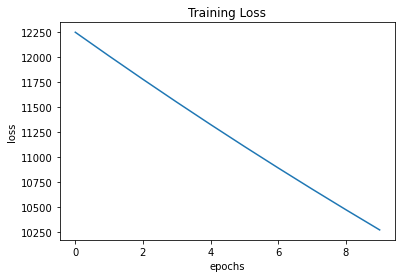

In [8]:
plt.plot(model.loss_per_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Loss')

## Predictions

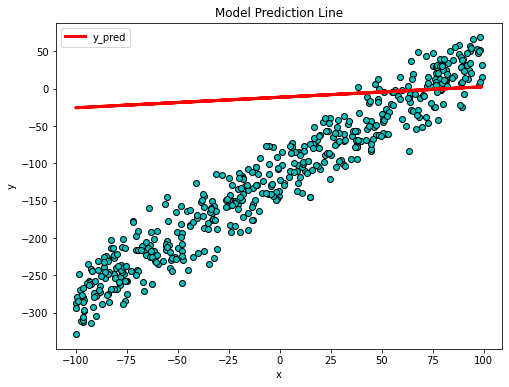

In [9]:
model.plot_fit_line(x_train, y_train)

In [10]:
indices = np.random.permutation(np.arange(x_train.shape[0]))[:100]
y_pred = model.predict(x_train[indices])
y_true = y_train[indices]

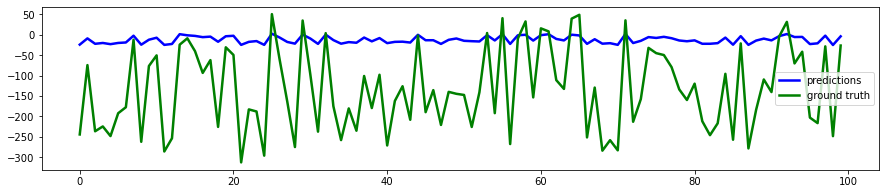

In [11]:
plt.figure(figsize=(15,3))
plt.plot(y_pred, 'b', lw=2.5, label='predictions')
plt.plot(y_true, 'g', lw=2.5, label='ground truth')
plt.legend(loc='best')

## Improving Model Performance

In [12]:
model.fit(x_train, y_train, epochs=20, alpha=0.5, verbose=False)

Text(0.5, 1.0, 'Training Loss')

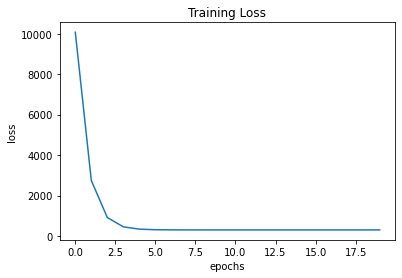

In [13]:
plt.plot(model.loss_per_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Loss')

In [14]:
min(model.loss_per_epochs)

298.39929385787906

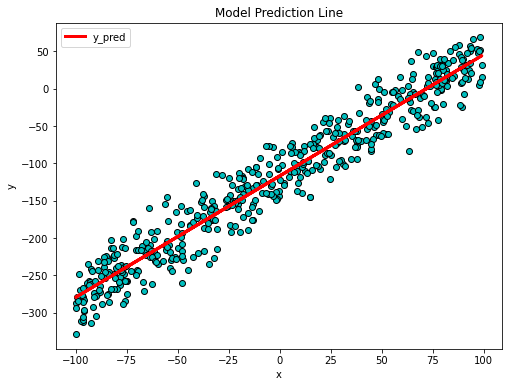

In [15]:
model.plot_fit_line(x_train, y_train)

In [16]:
indices = np.random.permutation(np.arange(x_train.shape[0]))[:100]
y_pred = model.predict(x_train[indices])
y_true = y_train[indices]

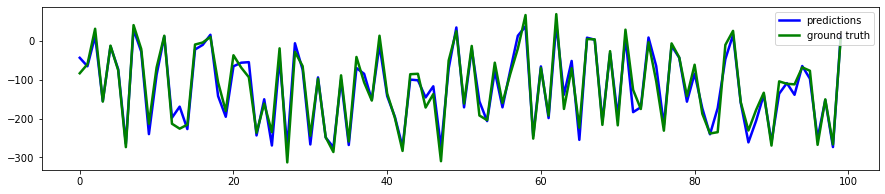

In [17]:
plt.figure(figsize=(15,3))
plt.plot(y_pred, 'b', lw=2.5, label='predictions')
plt.plot(y_true, 'g', lw=2.5, label='ground truth')
plt.legend(loc='best')

In [18]:
model.get_weights(return_scaling_params=True)

{'weight': array([97.08224666]),
 'bias': array([-119.69673806]),
 'scaling_mean': -1.7223117512526065,
 'scaling_std': 59.71361798568663}

## Evaluation

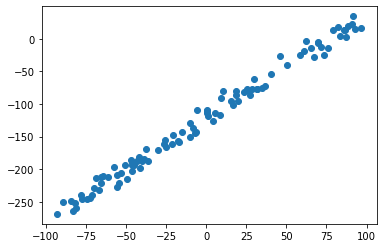

In [19]:
x_test, y_test, _, _ = generate_data(100, m=slope, c=intercept)
plt.scatter(x_test, y_test)

In [20]:
y_pred = model.predict(x_test)

In [21]:
test_loss = 0.5 * np.mean((y_pred - y_test) ** 2)
print('test loss : ', test_loss)

test loss :  56.329754961842845


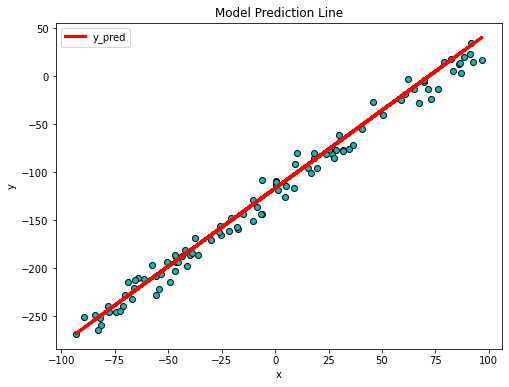

In [22]:
model.plot_fit_line(x_test, y_test)

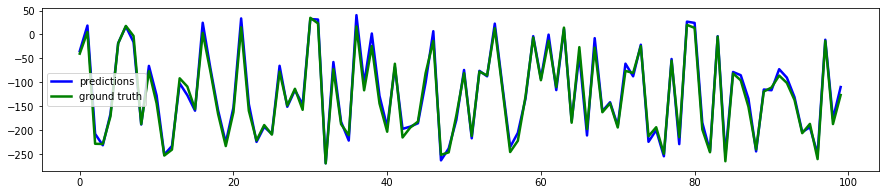

In [23]:
plt.figure(figsize=(15,3))
plt.plot(y_pred, 'b', lw=2.5, label='predictions')
plt.plot(y_test, 'g', lw=2.5, label='ground truth')
plt.legend(loc='best')